# Setting up the Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.options.display.max_rows = 150
pd.options.display.max_columns = 125

# Read in the Data  

In [2]:
# Read in the files
path = 'C:/Users/Richard/Documents/A_Documents/Cap_Data/CSV/'
app = pd.read_csv(path + 'application_train.csv')
bureau = pd.read_csv(path + 'bureau.csv')
bureau_balance = pd.read_csv(path + 'bureau_balance.csv')
prev_app = pd.read_csv(path + 'previous_application.csv')
pos_cash_bal = pd.read_csv(path + 'pos_cash_balance.csv')
instal_pay = pd.read_csv(path + 'installments_payments.csv')
credit_card_bal = pd.read_csv(path + 'credit_card_balance.csv')

# A list of lists to hold dataframes and their names for looping below
dfs = [[app, 'app'], [bureau, 'bureau'], [bureau_balance, 'bureau_balance'], [prev_app, 'prev_app'], [pos_cash_bal, 'pos_cash_bal'], [instal_pay, 'instal_pay'], [credit_card_bal, 'credit_card_bal']]


# Check Dimensions and Attribute Types for each Dataframe

In [3]:
# Count the columns, rows, numeric and catorgorical attributes

# Set up empty dataframe to hold values
info_table = pd.DataFrame(index = ['Attributes', 'Observations', 'Categorical', 'Numeric'])

# loop through all dataframes and populate the info_table with values
for pair in dfs:
    rows = pair[0].shape[0]
    cols = pair[0].shape[1]
    cat = sum(pair[0].dtypes == 'object')
    num = sum(pair[0].dtypes != 'object')
    info_table[pair[1]] = [cols, rows, cat, num]
info_table

,app,bureau,bureau_balance,prev_app,pos_cash_bal,instal_pay,credit_card_bal
Attributes,122,17,3,37,8,8,23
Observations,307511,1716428,27299925,1670214,10001358,13605401,3840312
Categorical,16,3,1,16,1,0,1
Numeric,106,14,2,21,7,8,22


# Check Balance of Target Variable
We have a very imbalanced target variable. This will need addressing when the prediction experiment is setup.

In [4]:
# Check the balance of the TARGET variable
# print(app['TARGET'].value_counts(dropna=False))
pd.DataFrame({'Count':app['TARGET'].value_counts(), \
'Percent (%)':round(app['TARGET'].value_counts()/len(app)*100,1)})

,Count,Percent (%)
0,282686,91.9
1,24825,8.1


Text(0.5,0,'Target Variable')

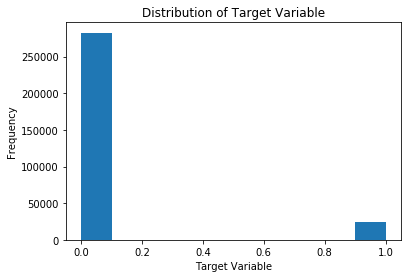

In [5]:
# Output a histogram to screen and png file (if needed)
app['TARGET'].plot.hist(title = 'Distribution of Target Variable')
plt.xlabel('Target Variable')
# plt.savefig('target_hist.png', bbox_inches='tight')
# plt.close()

# Examine Missing Values
Checking the missing values counts. Removing or imputing missing values will be addressed later.

In [6]:
# Count attributes and observations with missing values

def missing_values(df, name, p, q):
    # Set up empty dataframe to hold results
    results = pd.DataFrame(index = ['Attributes', 'Attributes with Missing Values', 'Attributes with Missing Values > '+str(p)+'%', \
                                   'Observations', 'Observations with Missing Values', 'Observations with Missing Values > '+str(q)+'%'])
    # Number of columns
    cols = df.shape[1]
    # Calculate number of missing values in each column
    no_mis_val_in_col = df.isnull().sum()  #sum() acts on cols in dataframe -> defaults to sum(axis=0)
    #Count number of cols with missing values
    no_col_with_mis_val = sum(no_mis_val_in_col != 0)
    # Calculate % of missing values in each column
    percent_mis_val_in_col = round(no_mis_val_in_col / len(df) * 100, 1) 
    # Calculate number of cols with missing values > p%
    no_cols_greater_p = sum(percent_mis_val_in_col > p)
    
    # Number of rows
    rows = len(df)
    # Calculate number of missing values in each row
    no_mis_val_in_row = df.isnull().sum(axis = 1)
    # Count number of rows with missing values
    no_rows_with_mis_val = np.count_nonzero(no_mis_val_in_row)
    # Calculate % of missing values in each row
    percent_mis_val_in_row = round(no_mis_val_in_row / cols * 100, 1)
    # Calculate number of rows with missing values > q%
    no_rows_greater_q = np.count_nonzero(percent_mis_val_in_row > q)
    
    results[name] = [cols, no_col_with_mis_val, no_cols_greater_p, rows, no_rows_with_mis_val, no_rows_greater_q]
    return results

hold = pd.DataFrame()
i = 1
p = 60
q = 50
for pair in dfs:
    if i == 1:
        hold = missing_values(pair[0], pair[1], p, q)
    else: 
        hold = pd.merge(hold, missing_values(pair[0], pair[1], p, q), left_index=True, right_index=True)
    i += 1
hold

,app,bureau,bureau_balance,prev_app,pos_cash_bal,instal_pay,credit_card_bal
Attributes,122,17,3,37,8,8,23
Attributes with Missing Values,67,7,0,16,2,2,9
Attributes with Missing Values > 60%,17,2,0,2,0,0,0
Observations,307511,1716428,27299925,1670214,10001358,13605401,3840312
Observations with Missing Values,298909,1676762,0,1670143,26184,2905,826036
Observations with Missing Values > 50%,0,0,0,0,0,0,0
